In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.columns=df.columns.str.lower()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [7]:
df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df['totalcharges']=df['totalcharges'].replace(" ",np.nan).astype('float')
df['totalcharges']=df['totalcharges'].fillna(df['monthlycharges']*df['tenure'])
df['totalcharges'].dtype

dtype('float64')

<Figure size 1000x300 with 0 Axes>

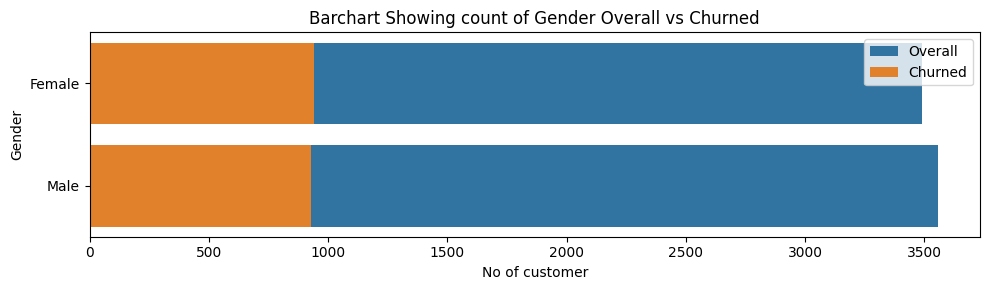

<Figure size 640x480 with 0 Axes>

In [11]:
#plotting barchart showing no of male customers vs female
df_churn=df[df['churn']=='Yes']
plt.figure(figsize=(10,3))
y='gender'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

Gender is mostly equal for both overall and churn data.

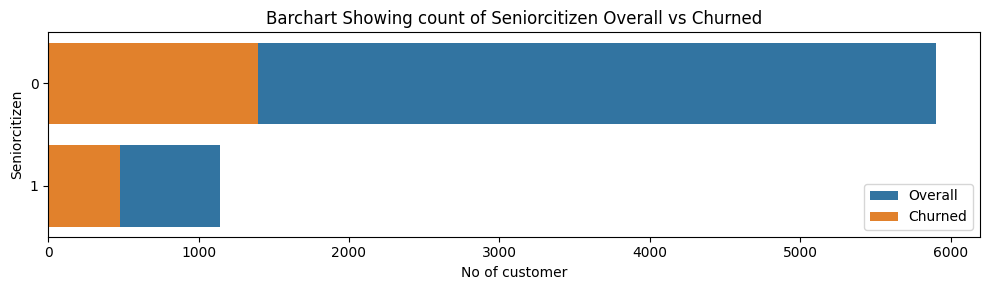

<Figure size 640x480 with 0 Axes>

Almost 41.68% of senior citizen churned.


In [12]:
#plotting barchart showing count of senior citizen
y='seniorcitizen'
y_order = df[y].unique()
plt.figure(figsize=(10,3))

sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#Calculating percentage of senior citizen to churn
senior_citizen_churn_percent=df[(df['churn']=='Yes') & (df['seniorcitizen']==1)].shape[0]/df[df['seniorcitizen']==1].shape[0]*100
print(f'Almost {senior_citizen_churn_percent:.2f}% of senior citizen churned.')

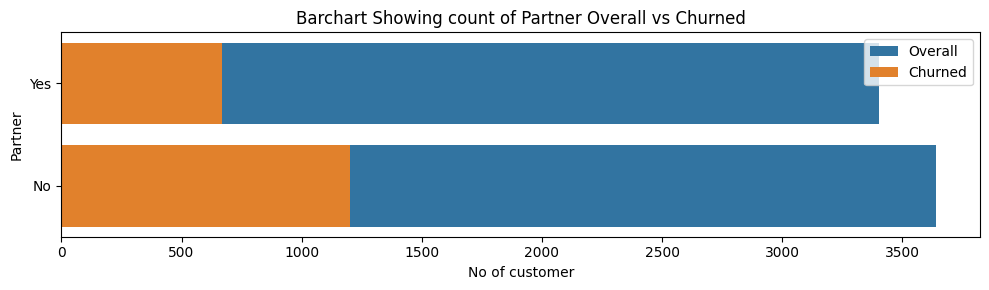

In [13]:
#plotting barchart showing count of senior citizen
y='partner'
y_order = df[y].unique()
plt.figure(figsize=(10,3))

sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()


The number of customers with no partner that churned the service is lot higher.
The difference in overall and in churned customer is also high.

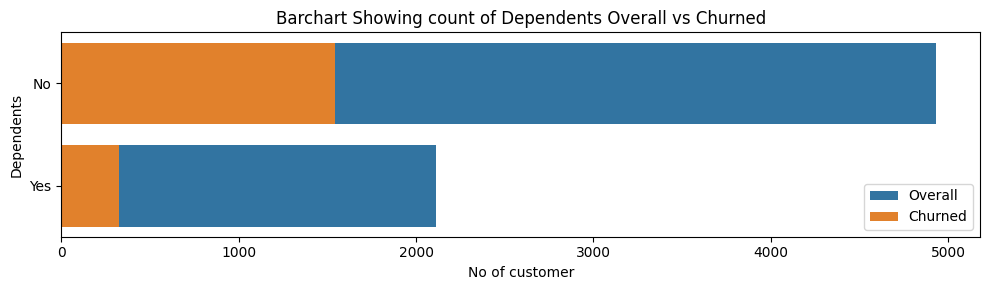

In [14]:
#plotting barchart showing count of senior citizen
y='dependents'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()


Customer with no dependent are more likely to churn.

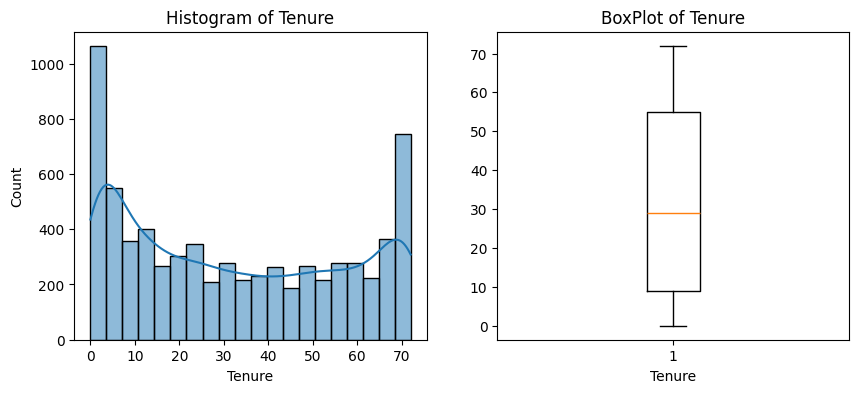

In [15]:
#histogram of tenure
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['tenure'],kde=True,bins=20)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')

#Box plot of tenure
plt.subplot(1,2,2)
plt.boxplot(df['tenure'])
plt.title('BoxPlot of Tenure')
plt.xlabel('Tenure')

plt.show()

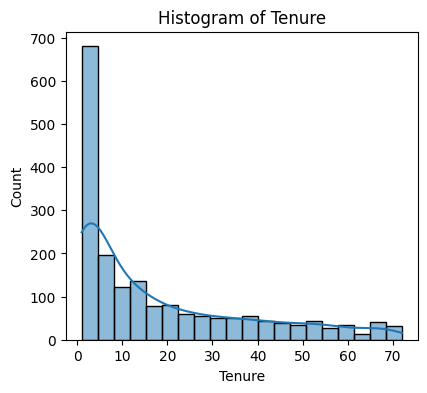

In [16]:
#histogram of tenure
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df_churn['tenure'],kde=True,bins=20)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure')

plt.show()

customer with lower tenure are more likely to churn

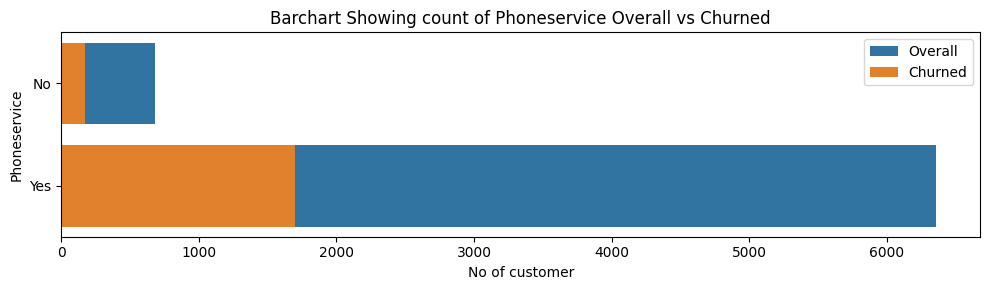

In [17]:
#plotting barchart showing count of senior citizen
y='phoneservice'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

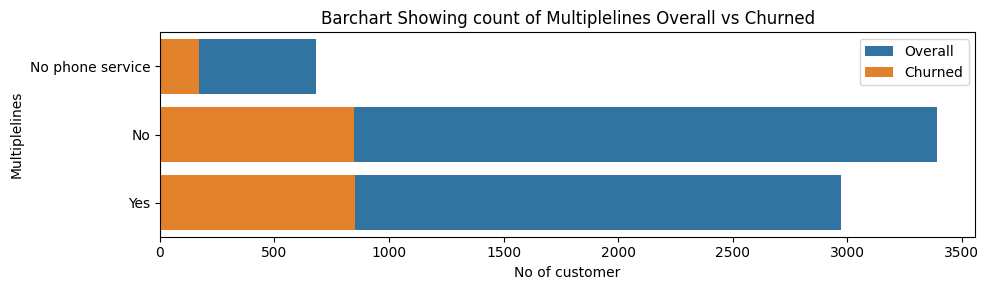

In [18]:
#plotting barchart showing count of senior citizen
y='multiplelines'
y_order = df[y].unique()

plt.figure(figsize=(10,3))

sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

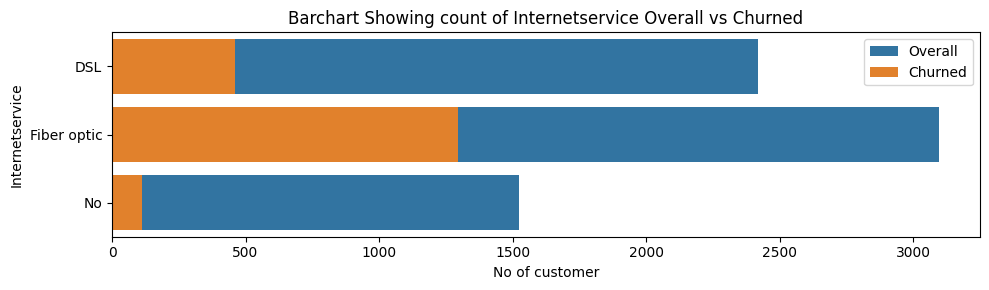

In [19]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='internetservice'
y_order = df[y].unique()
plt.figure(figsize=(10,3))

sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

the ratio of churned and overall is very low for DSL an No internet service while fiber optic is high.

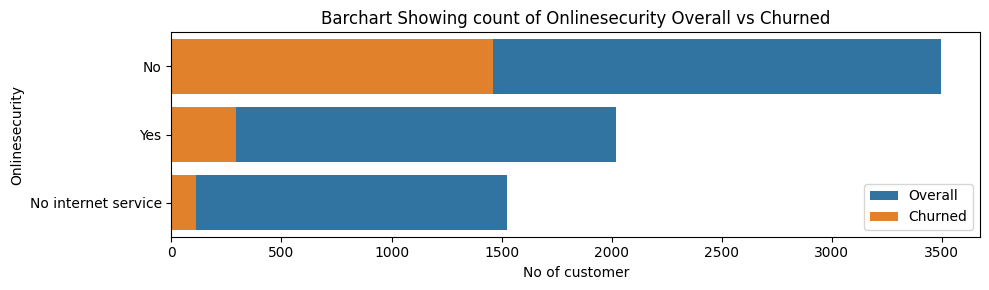

In [20]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='onlinesecurity'
y_order = df[y].unique()
plt.figure(figsize=(10,3))

sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

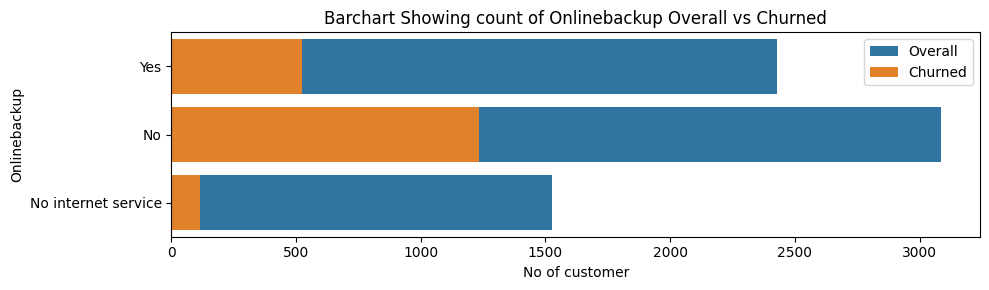

In [22]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='onlinebackup'
y_order = df[y].unique()
plt.figure(figsize=(10,3))

sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

customer with no online backup are more likely to churn

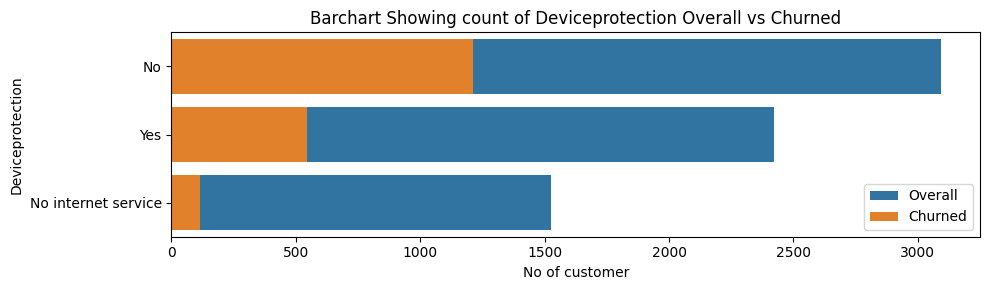

In [23]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='deviceprotection'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

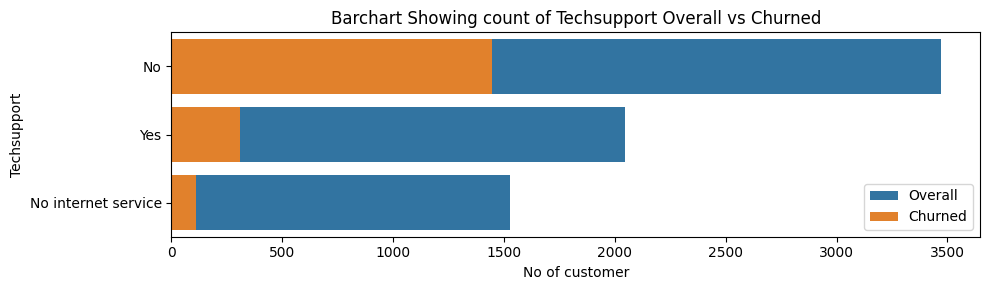

In [24]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='techsupport'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

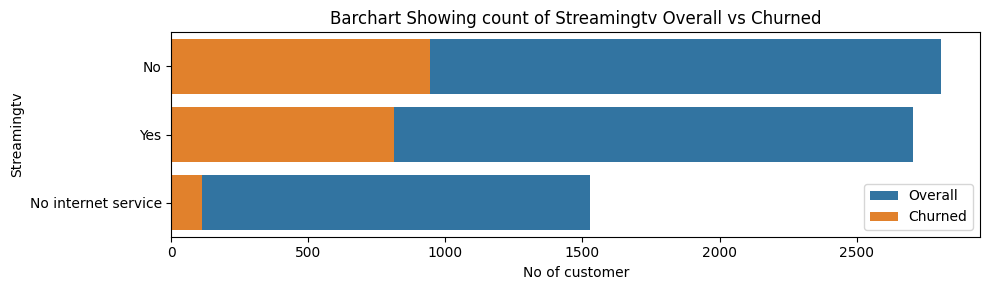

In [25]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='streamingtv'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

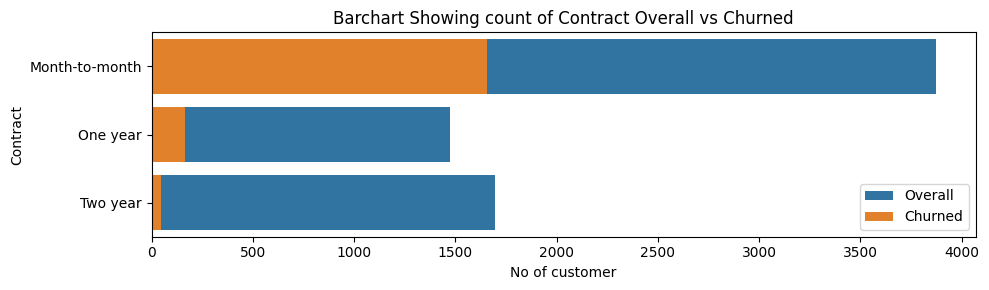

In [26]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='contract'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

number of customer with month to month subscription has high rate of churning

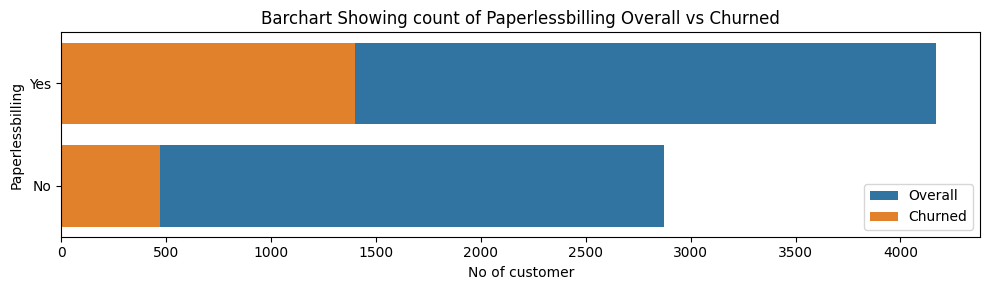

In [27]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='paperlessbilling'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

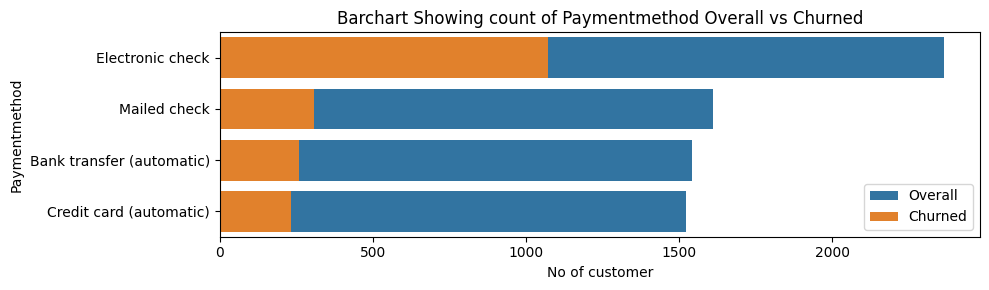

In [28]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='paymentmethod'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

#'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'

plt.tight_layout()
plt.show()

customer paying through electronic check are more likely to churn

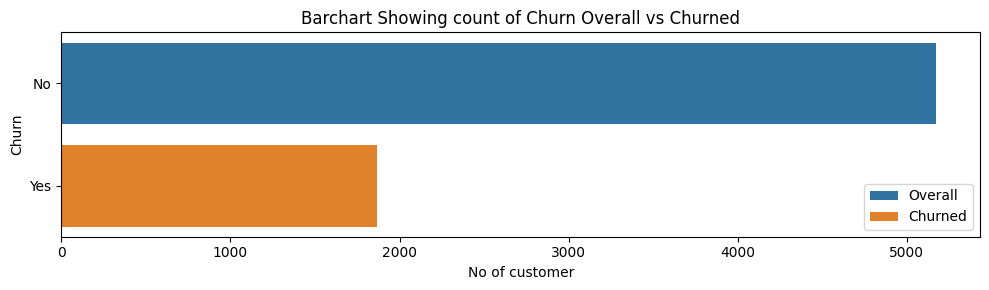

In [29]:
#plotting barchart showing count of senior citizen Overall vs Churned
y='churn'
y_order = df[y].unique()
plt.figure(figsize=(10,3))
#plt.subplot(1,2,1)
sns.countplot(y=y,data=df,orient='h',order=y_order)
sns.countplot(y=y,data=df_churn,orient='h',order=y_order)
plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel(y.title())
plt.legend(['Overall','Churned'])

plt.tight_layout()
plt.show()

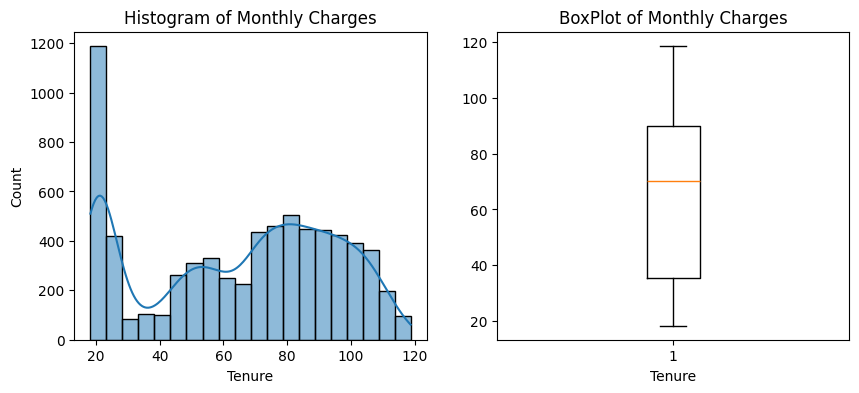

In [30]:
#histogram of monthlycharges
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['monthlycharges'],kde=True,bins=20)
plt.title('Histogram of Monthly Charges')
plt.xlabel('Tenure')

#Box plot of monthlycharges
plt.subplot(1,2,2)
plt.boxplot(df['monthlycharges'])
plt.title('BoxPlot of Monthly Charges')
plt.xlabel('Tenure')

plt.show()

In [31]:
df['totalcharges'].dtype

dtype('float64')

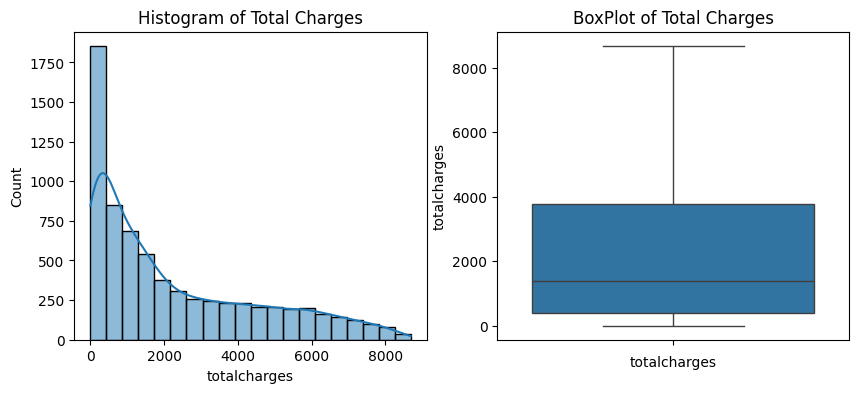

In [32]:
#histogram of monthlycharges
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['totalcharges'],kde=True,bins=20)
plt.title('Histogram of Total Charges')
plt.xlabel('totalcharges')

#Box plot of monthlycharges
plt.subplot(1,2,2)
sns.boxplot(df['totalcharges'])
plt.title('BoxPlot of Total Charges')
plt.xlabel('totalcharges')

plt.show()

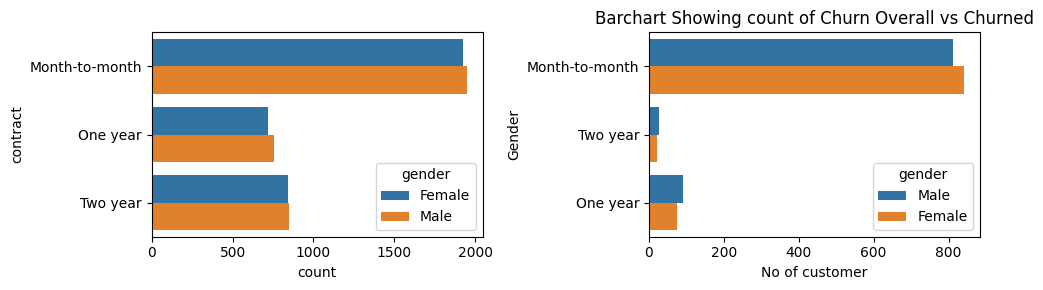

In [33]:
y_order = df[y].unique()
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(y='contract',data=df,orient='h',stat='count',hue='gender')
plt.subplot(1,2,2)
sns.countplot(y='contract',data=df_churn,orient='h',stat='count',hue='gender')


plt.title('Barchart Showing count of ' + y.title()+ ' Overall vs Churned')
plt.xlabel('No of customer')
plt.ylabel('Gender')

plt.tight_layout()
plt.show()

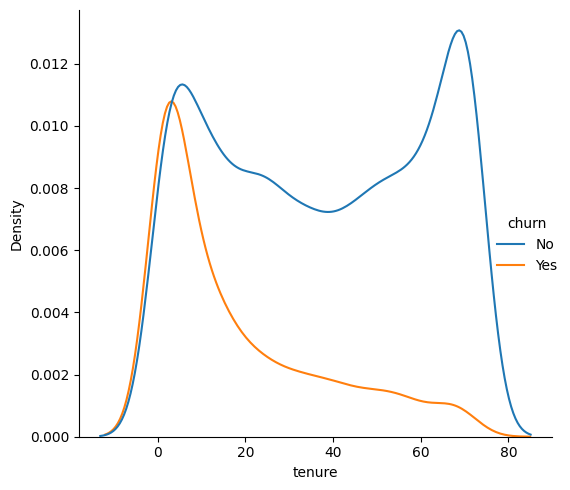

In [34]:

sns.displot(data=df, x='tenure', kind='kde', hue='churn')


plt.tight_layout()
plt.show()

In [35]:
tenure_bins=[]
for i in df['tenure']:
    if i<20:
        tenure_bins.append('0-20')

    elif i<40:
        tenure_bins.append('21-40')

    elif i<60:
        tenure_bins.append('41-60')

    else:
        tenure_bins.append('60+')

In [36]:
df['tenure_bins']=tenure_bins

In [37]:
df.to_csv('telco.csv')

In [38]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_bins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-20
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,21-40
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-20
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,41-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-20


In [39]:
df_model=df

## Feature Engineering

In [40]:
df_model.head()
df_model=df_model.drop('customerid', axis=1)

In [41]:
df_model.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'tenure_bins'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
#selecting categorial columns 
categorical_values=df_model.select_dtypes(['object']).columns

#Converting categorical columns to numeric
encoder=LabelEncoder()
for column in categorical_values:
    df_model[column]=encoder.fit_transform(df[column])

scaler=StandardScaler()

numerical_columns=df.select_dtypes(['int','float']).columns[1:]
df_model[numerical_columns]=scaler.fit_transform(df_model[numerical_columns])

In [44]:
df_model.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_bins
0,0,0,1,0,-1.277445,0,1,0,0,2,...,0,0,0,0,1,2,-1.160323,-0.992611,0,0
1,1,0,0,0,0.066327,1,0,0,2,0,...,0,0,0,1,0,3,-0.259629,-0.172165,0,1
2,1,0,0,0,-1.236724,1,0,0,2,2,...,0,0,0,0,1,3,-0.362660,-0.958066,1,0
3,1,0,0,0,0.514251,0,1,0,2,0,...,2,0,0,1,0,0,-0.746535,-0.193672,0,2
4,0,0,0,0,-1.236724,1,0,1,0,0,...,0,0,0,0,1,2,0.197365,-0.938874,1,0


In [45]:
#Splitting the data
X=df_model.drop('churn',axis=1)
y=df_model['churn']

In [46]:
#splitting train test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 20)
(2113, 20)
(4930,)
(2113,)


In [47]:
#fitting the data
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred=model.predict(X_test)

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report


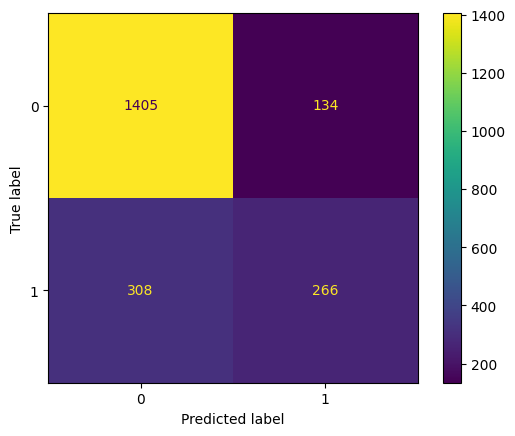

In [50]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [51]:
print (accuracy_score(y_test,y_pred))

0.7908187411263606


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.67      0.46      0.55       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [55]:
from imblearn.combine import SMOTEENN

In [57]:
sm=SMOTEENN()
X_resampled,y_resampled=sm.fit_resample(X,y)

In [58]:
#splitting train test data
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4554, 20)
(1953, 20)
(4554,)
(1953,)


In [59]:
#fitting the data
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
y_pred_smot=model.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred_smot))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       858
           1       0.95      0.98      0.96      1095

    accuracy                           0.95      1953
   macro avg       0.96      0.95      0.95      1953
weighted avg       0.96      0.95      0.95      1953



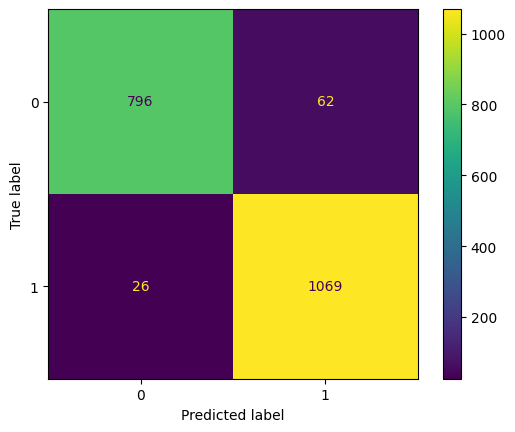

In [63]:
cm=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

In [70]:
churn_probability=model.predict_proba(X)[:,1]

In [71]:
df['churn_probability']=churn_probability

In [75]:
#extracting churn probabilities from the df
df_churn_proba=df[['customerid','churn_probability']]

In [81]:
# Define thresholds and classify
def classify_risk(churn_probability):
    if churn_probability < 0.5:
        return 'Non-risky'
    elif 0.5 <= churn_probability < 0.8:
        return 'Risky'
    else:
        return 'High-risky'

# Apply the classification function
df_churn_proba.loc[:, 'Classification']  = df_churn_proba['churn_probability'].apply(classify_risk)

In [82]:
df_churn_proba

,customerid,churn_probability,Classification
0,7590-VHVEG,0.98,High-risky
1,5575-GNVDE,0.00,Non-risky
2,3668-QPYBK,0.91,High-risky
3,7795-CFOCW,0.00,Non-risky
4,9237-HQITU,1.00,High-risky
...,...,...,...
7038,6840-RESVB,0.06,Non-risky
7039,2234-XADUH,0.34,Non-risky
7040,4801-JZAZL,0.63,Risky
7041,8361-LTMKD,0.99,High-risky


In [83]:
df_churn_proba.to_csv('churn_proba.csv')